### Data Preparation 

To prepare data for our assignment we:  
- downloaded [world bank data](http://data.worldbank.org/indicator/NY.GDP.MKTP.CN)
- fixed the format of GDP data as it contained additional lines not supported by pandas
- removed last unnamed columns from booth GDP and Metadata csv files running the following code: 
`DataFrame.drop(DataFrame.columns[-1], axis=1)`


In [207]:
# importing libraries

import pandas as pd 
import matplotlib.pyplot as plt

DF = pd.DataFrame

In [208]:
# import GDP data

GDP = pd.read_csv("./Data/Countries_GDP.csv")

In [209]:
# import country metadata

Country_Metadata = pd.read_csv("./Data/Metadata_Country.csv")

In [210]:
# import adn refine deflation indicators 

Deflation_Indicators = pd.read_csv("./Data/Deflation_Indicators.csv")

columns_of_interest = ['Country Code', '2014', '2015', '2016', '2017', '2018','2019', '2020', '2021', '2022', '2023']
Deflation_Indicators = Deflation_Indicators[columns_of_interest]

Deflation_Indicators[['2014', '2015', '2016', '2017', '2018','2019', '2020', '2021', '2022', '2023']] = Deflation_Indicators[['2014', '2015', '2016', '2017', '2018','2019', '2020', '2021', '2022', '2023']].apply(pd.to_numeric, errors='coerce')
Deflation_Indicators['Deflation_Indicators_5Year_Mean'] = Deflation_Indicators[['2019', '2020', '2021', '2022', '2023']].mean(axis=1)


In [211]:
# import and refine government consumption

Government_Consumption = pd.read_csv("./Data/Government_Consumption.csv")

columns_of_interest = [
    'Country Code', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', 
    '2022 [YR2022]', '2023 [YR2023]'
]
Government_Consumption = Government_Consumption[columns_of_interest]
Government_Consumption.columns = ['Country Code', '2019', '2020', '2021', '2022', '2023']
Government_Consumption[['2019', '2020', '2021', '2022', '2023']] = Government_Consumption[['2019', '2020', '2021', '2022', '2023']].apply(pd.to_numeric, errors='coerce')
Government_Consumption['Government_Spending_5Year_Mean'] = Government_Consumption[['2019', '2020', '2021', '2022', '2023']].mean(axis=1)

In [212]:
# import and refine foreign investment

Foreign_Investment = pd.read_csv('./Data/Foreign_Investment.csv')

columns_of_interest = [
    'Country Code', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', 
    '2022 [YR2022]', '2023 [YR2023]'
]
Foreign_Investment = Foreign_Investment[columns_of_interest]
Foreign_Investment.columns = ['Country Code', '2019', '2020', '2021', '2022', '2023']
Foreign_Investment[['2019', '2020', '2021', '2022', '2023']] = Foreign_Investment[['2019', '2020', '2021', '2022', '2023']].apply(pd.to_numeric, errors='coerce')
Foreign_Investment['Foreign_Investment_5Year_Mean'] = Foreign_Investment[['2019', '2020', '2021', '2022', '2023']].mean(axis=1)


In [213]:
# import and refine foreign investment

Final_Consumption = pd.read_csv('./Data/Final_Consumption.csv')

columns_of_interest = [
    'Country Code', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', 
    '2022 [YR2022]', '2023 [YR2023]'
]
Final_Consumption = Final_Consumption[columns_of_interest]
Final_Consumption.columns = ['Country Code', '2019', '2020', '2021', '2022', '2023']
Final_Consumption[['2019', '2020', '2021', '2022', '2023']] = Final_Consumption[['2019', '2020', '2021', '2022', '2023']].apply(pd.to_numeric, errors='coerce')
Final_Consumption['Final_Consumption_5Year_Mean'] = Final_Consumption[['2019', '2020', '2021', '2022', '2023']].mean(axis=1)


In [214]:
# Combine all required data to a useful dataset 

GDP = pd.merge(GDP, Deflation_Indicators, on='Country Code') # Add deflation indicators
GDP = pd.merge(GDP, Country_Metadata[['Country Code', 'Region']], on='Country Code') # Add regions 
GDP = pd.merge(GDP, Government_Consumption[['Country Code', 'Government_Spending_5Year_Mean']], on ='Country Code') # Add government spending 5 year mean
GDP = pd.merge(GDP, Foreign_Investment[['Country Code', 'Foreign_Investment_5Year_Mean']], on ='Country Code') # Add foreign investment 5 year mean
GDP = pd.merge(GDP, Final_Consumption[['Country Code', 'Final_Consumption_5Year_Mean']], on ='Country Code') # Add final consumption 5 year mean

GDP

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2019_y,2020_y,2021_y,2022_y,2023_y,Deflation_Indicators_5Year_Mean,Region,Government_Spending_5Year_Mean,Foreign_Investment_5Year_Mean,Final_Consumption_5Year_Mean
0,0,Aruba,ABW,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,116.765942,115.654945,109.973252,113.445414,121.056990,115.379309,Latin America & Caribbean,22.930396,3.781322,NaN
1,2,Afghanistan,AFG,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,103.267440,110.457896,113.593791,124.278695,127.959400,115.911444,South Asia,21.601827,0.135138,NaN
2,4,Angola,AGO,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,1959.342696,2170.228813,3012.792411,3425.864147,4029.485573,2919.542728,Sub-Saharan Africa,7.640275,-4.999405,5.627339e+10
3,5,Albania,ALB,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,111.003416,111.048999,114.873970,126.202352,133.857849,119.397317,Europe & Central Asia,12.653239,7.189219,1.197209e+10
4,6,Andorra,AND,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,105.382769,106.556507,109.283140,113.913087,121.084600,111.244021,Europe & Central Asia,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,261,Kosovo,XKX,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,121.056552,122.728472,130.233981,139.609149,145.980600,131.921751,Europe & Central Asia,12.732402,6.178507,7.896735e+09
213,262,"Yemen, Rep.",YEM,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa,NaN,0.015220,NaN
214,263,South Africa,ZAF,GDP (current LCU),NY.GDP.MKTP.CN,6.249000e+09,6.590000e+09,7.010000e+09,7.753000e+09,8.540000e+09,...,122.722843,129.339316,137.796413,144.675860,151.626481,137.232182,Sub-Saharan Africa,19.543504,3.016420,3.056567e+11
215,264,Zambia,ZMB,GDP (current LCU),NY.GDP.MKTP.CN,4.991000e+05,4.874000e+05,4.852000e+05,5.031000e+05,5.876000e+05,...,212.029337,241.530824,302.258383,320.818010,343.578859,284.043083,Sub-Saharan Africa,14.334112,1.115025,NaN


### Task 1
Które kraje miały największy wzrost gospodarczy w ostatnich 5 latach.

In [215]:
# Filter data from 2023 and 2019
GDP5Years = GDP[["Country Name", "2019_x", "2023_x", "2019_y", "2023_y", "Region", "Government_Spending_5Year_Mean", "Foreign_Investment_5Year_Mean", "Final_Consumption_5Year_Mean", "Deflation_Indicators_5Year_Mean"]].copy()

# Cast types
GDP['2019_y'] = pd.to_numeric(GDP['2019_y'], errors='coerce')
GDP['2023_y'] = pd.to_numeric(GDP['2023_y'], errors='coerce')

# Calculate differences
GDP5Years["Difference"] = (GDP["2023_x"] / GDP["2023_y"]) / (GDP["2019_x"] /GDP["2019_y"] )
A = GDP5Years.sort_values("Difference", ascending = False)

DF.head(A)


,Country Name,2019_x,2023_x,2019_y,2023_y,Region,Government_Spending_5Year_Mean,Foreign_Investment_5Year_Mean,Final_Consumption_5Year_Mean,Deflation_Indicators_5Year_Mean,Difference
81,Guyana,1.078729e+12,3.577758e+12,103.317329,91.020711,Latin America & Caribbean,NaN,17.453510,NaN,93.633823,3.764710
191,Tajikistan,7.910980e+10,1.307915e+11,1092.199818,1351.703069,Europe & Central Asia,10.935456,1.520733,9.525326e+09,1219.751265,1.335888
90,Ireland,3.636749e+11,5.099518e+11,106.038960,116.316521,Europe & Central Asia,11.867311,-0.296416,1.654254e+11,108.749050,1.278321
39,"Congo, Dem. Rep.",8.531415e+13,1.622540e+14,673.855504,1003.102292,Sub-Saharan Africa,8.012920,2.887310,3.563783e+10,813.690583,1.277603
192,Turkmenistan,1.583150e+11,2.122010e+11,256.936199,271.251253,Europe & Central Asia,9.824855,NaN,NaN,261.396087,1.269635


### Task 2
Jak Polska wypada na tle innych krajów Europy? 

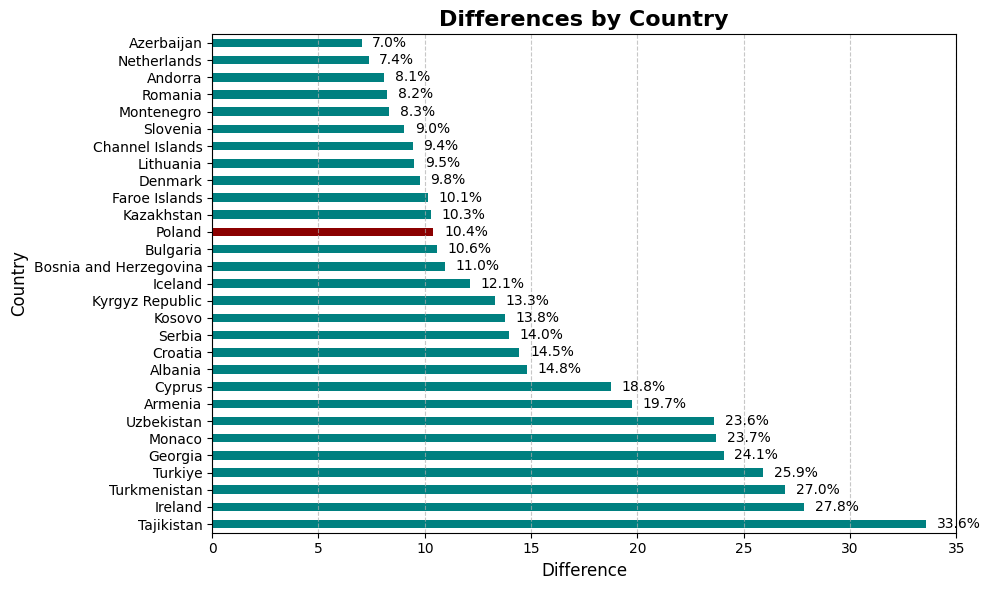

In [216]:
# Filter data for Europe & Central Asia
GDPEurope = GDP5Years[GDP5Years['Region'] == 'Europe & Central Asia']
GDPEurope = GDPEurope.sort_values("Difference", ascending = False).reset_index(drop=True)

# Plot the values 

GDPEurope['Percentage Difference'] = (GDPEurope['Difference'] - 1) * 100 # Add percentage 
colors = ['teal' if country != 'Poland' else 'darkred' for country in GDPEurope['Country Name']]
GDPEurope

ax = GDPEurope.iloc[0:29].plot(
    kind='barh',
    x='Country Name',
    y='Percentage Difference',
    color= colors,
    figsize=(10, 6),
    legend=False
)

ax.set_xlim(0, 35)

# Add a title and axis labels
ax.set_title('Differences by Country', fontsize=16, fontweight='bold')
ax.set_xlabel('Difference', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

# Customize tick parameters
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add gridlines 
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the bars
for i in ax.patches:
    ax.text(
        i.get_width() + 0.5,  # Adjust text placement
        i.get_y() + i.get_height() / 2,
        f'{i.get_width():.1f}%',  # Format as percentage
        va='center',
        fontsize=10
    )
# Show the plot
plt.tight_layout()
plt.show()



### Task 3
Proszę podzielić dane na grupy w zależności od regionów i dla tych grup wykonać statystyki opisowe.

In [217]:
region_stats = GDP5Years.groupby('Region')['Difference'].agg([
    'mean',       # Mean value
    'median',     # Median value
    'std',        # Standard deviation
    'min',        # Minimum value
    'max',        # Maximum value
    'var'         # Variance
]).reset_index()

region_stats.columns = [
    'Region', 
    'Mean_Difference', 
    'Median_Difference', 
    'Std_Deviation', 
    'Minimum_Difference', 
    'Maximum_Difference',
    'Variance_Difference'
]

region_stats

,Region,Mean_Difference,Median_Difference,Std_Deviation,Minimum_Difference,Maximum_Difference,Variance_Difference
0,East Asia & Pacific,1.032475,1.047650,0.104346,0.793893,1.201401,0.010888
1,Europe & Central Asia,1.094416,1.080973,0.092861,0.747070,1.335888,0.008623
2,Latin America & Caribbean,1.114532,1.038675,0.454088,0.857917,3.764710,0.206196
3,Middle East & North Africa,1.070988,1.076002,0.093941,0.914977,1.226134,0.008825
4,North America,1.063198,1.050980,0.027227,1.044220,1.094394,0.000741
5,South Asia,1.056796,1.101376,0.175834,0.745351,1.253226,0.030918
6,Sub-Saharan Africa,1.105664,1.108358,0.098261,0.748265,1.277603,0.009655


### Task 4
Jakie czynniki kraju są związane ze wzrostem PKB? Wygeneruj raporty w formie tabelek potwierdzających odpowiedź.

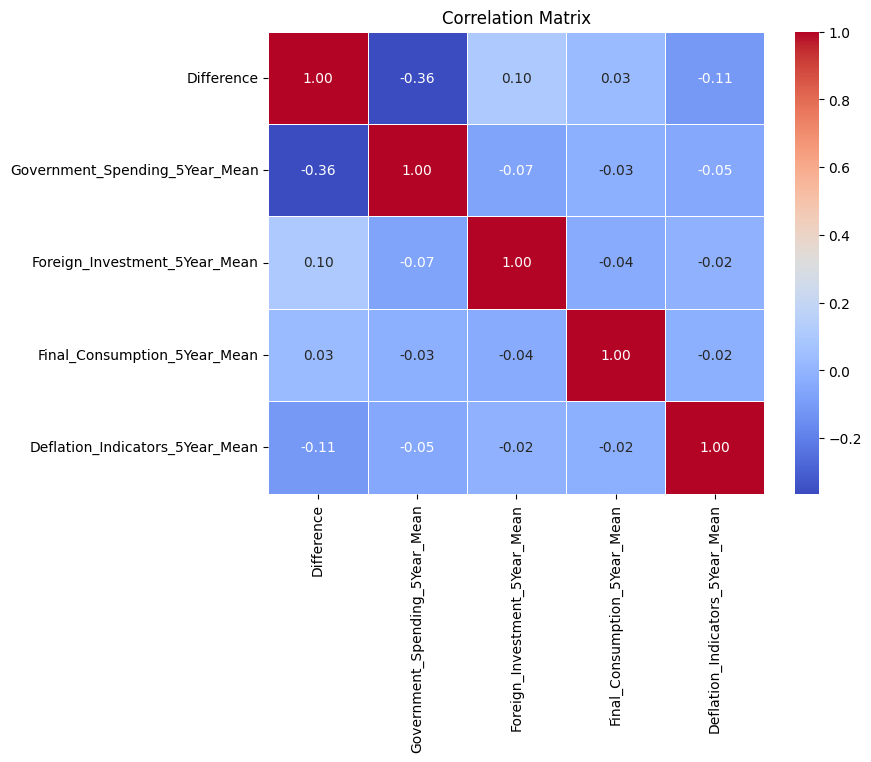

In [218]:
import seaborn as sns

correlation_matrix = GDP5Years[["Difference", "Government_Spending_5Year_Mean", "Foreign_Investment_5Year_Mean", "Final_Consumption_5Year_Mean","Deflation_Indicators_5Year_Mean"]].corr();

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

### Task 5 
Stworzyć zbiorcze raporty dla poszczególnych krajów z Unii Europejskiej i ogólny dla całej Unii.

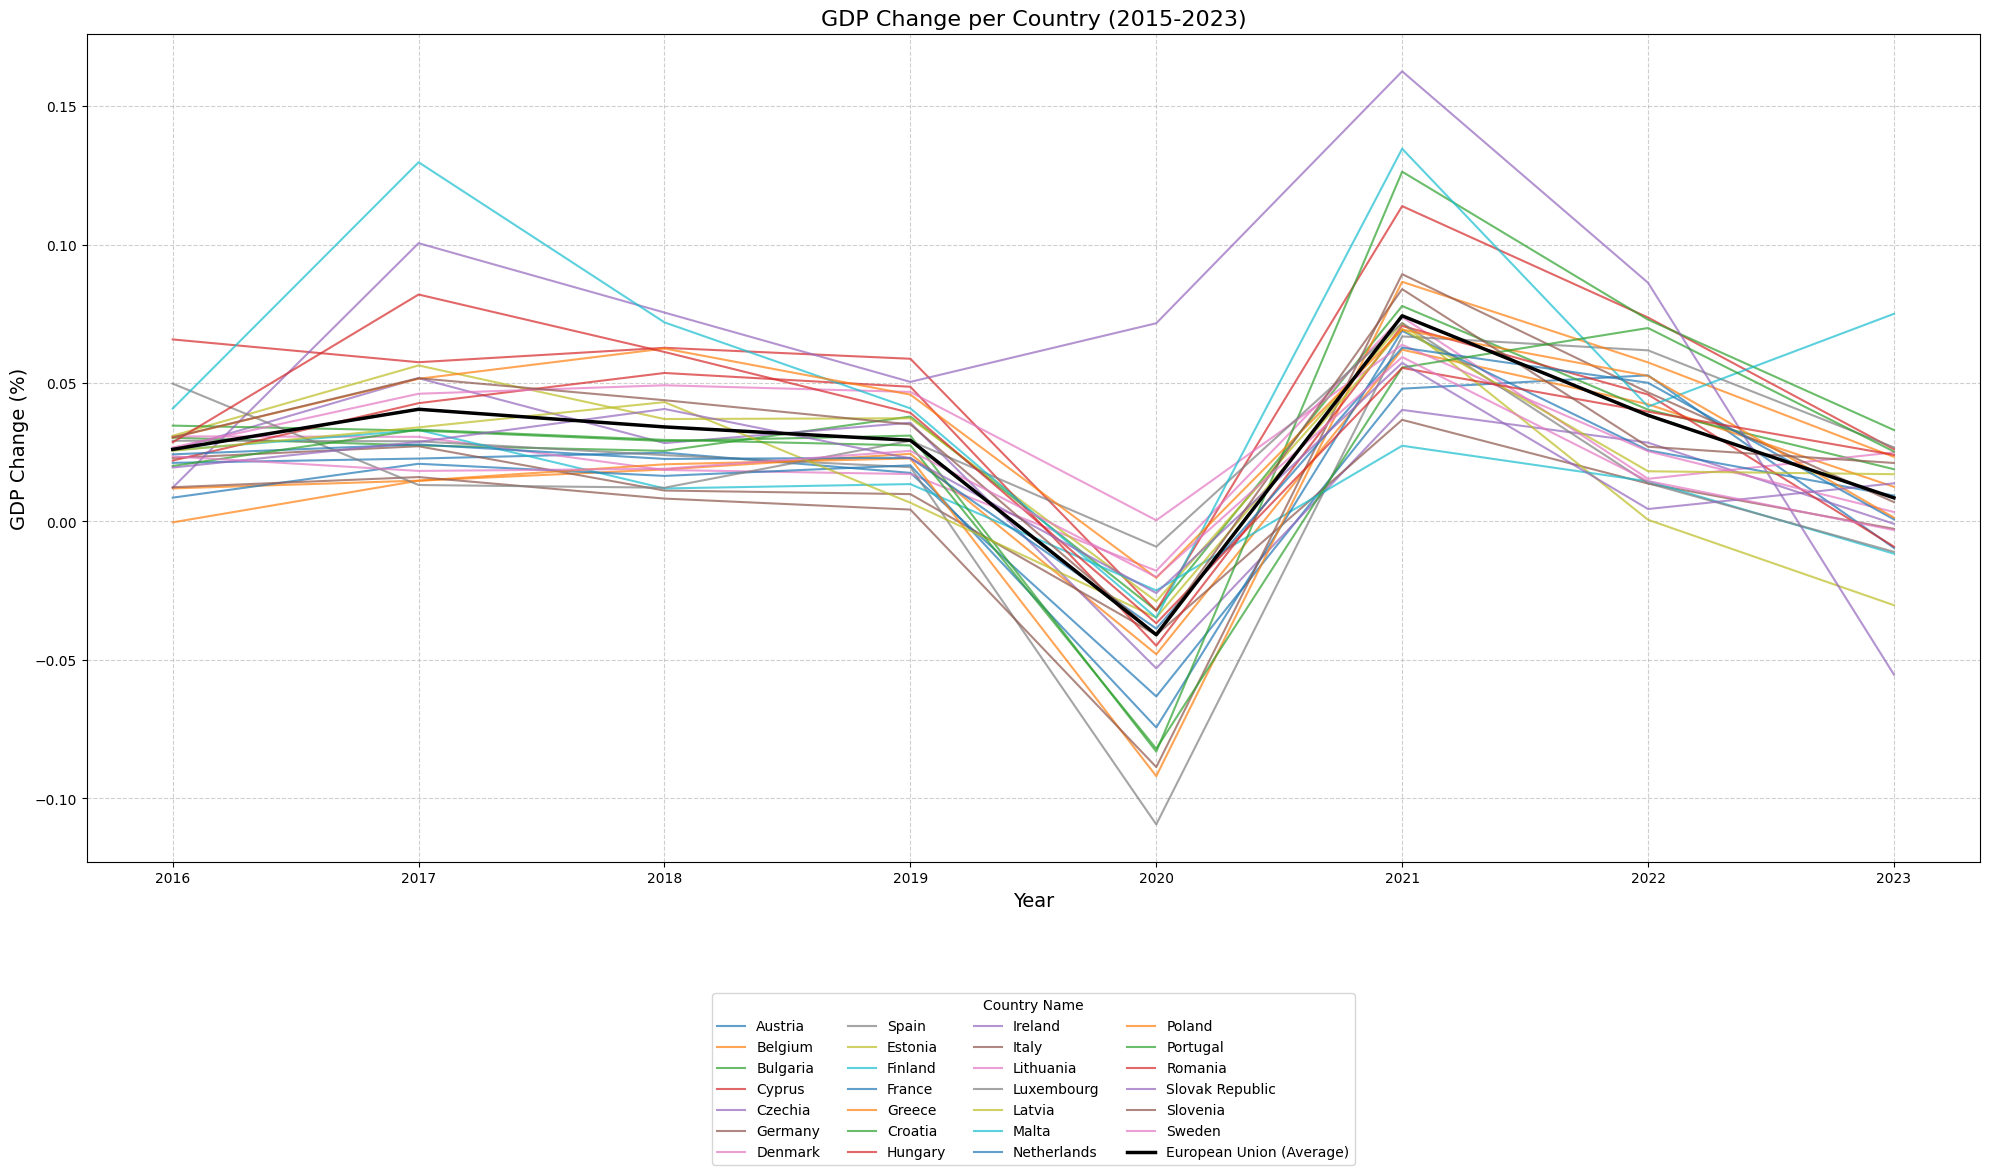

In [231]:
# Filter EU Countries
EU_Country_Codes = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']
EU_GDP = GDP[GDP['Country Code'].isin(EU_Country_Codes)].copy()


# Calculate Real GDP from last 10 years 

for i in range(2015, 2024): 
    EU_GDP[f"{i} Real"] = (EU_GDP[f"{i}_x"] / EU_GDP[f"{i}_y"]) / (EU_GDP[f"{i-1}_x"] / EU_GDP[f"{i-1}_y"]) - 1

EU_GDP
#Filter out unnecessary columns 
cols_by_range = EU_GDP.iloc[:, -9:]
cols_by_name = EU_GDP[['Country Name', 'Country Code']]

EU_GDP = pd.concat([cols_by_name, cols_by_range], axis = 1)

EU_Mean = EU_GDP.iloc[:, 2:].mean()
EU_Mean['Country Name'] = 'European Union'

EU_Mean['Country Code'] = 'EU'

# Add the EU Mean to the DataFrame
EU_GDP = pd.concat([EU_GDP, EU_Mean.to_frame().T], ignore_index=True)

# Preprocess DataFrame for plotting
EU_GDP.columns = EU_GDP.columns.str.strip()  # Remove leading/trailing spaces
EU_GDP.columns = EU_GDP.columns.str.replace(' Real', '')  # Remove ' Real' suffix
EU_GDP.set_index('Country Name', inplace=True)  # Set 'Country Name' as the index
EU_GDP = EU_GDP.iloc[:, 2:].transpose()  # Transpose DataFrame: years as rows, countries as columns
EU_GDP = EU_GDP.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data

# Plotting the data
plt.figure(figsize=(20, 12))  # Adjust figure size for better readability

# Plot all countries
for column in EU_GDP.columns:
    if column != 'European Union':
        plt.plot(EU_GDP.index, EU_GDP[column], label=column, alpha=0.7)

# Highlight the EU line with a thicker black line
plt.plot(EU_GDP.index, EU_GDP['European Union'], label='European Union (Average)', color='black', linewidth=2.5)

# Adding titles and labels
plt.title("GDP Change per Country (2015-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP Change (%)", fontsize=14)
plt.legend(title='Country Name', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for clarity

# Show the plot
plt.tight_layout()
plt.show()


In [228]:
EU_Mean = EU_GDP.iloc[:, 2:].mean()
EU_Mean

EU_Mean['Country Name'] = 'European Union'

EU_GDP = pd.concat([EU_GDP, EU_Mean.to_frame().T], ignore_index=True)



       Country Name Country Code 2015 Real 2016 Real 2017 Real 2018 Real  \
0           Austria          AUT  0.013035  0.021172  0.022723  0.024842   
1           Belgium          BEL  0.014742  0.011935  0.014745   0.01878   
2          Bulgaria          BGR  0.033976  0.030266  0.027459  0.025495   
3            Cyprus          CYP  0.034189  0.065736  0.057508  0.062717   
4           Czechia          CZE  0.049588  0.025809  0.051736  0.028303   
5           Germany          DEU  0.016527  0.022947   0.02716  0.011164   
6           Denmark          DNK  0.021044   0.03073  0.030565    0.0186   
7             Spain          ESP  0.040609  0.029152   0.02896  0.023954   
8           Estonia          EST  0.018382   0.03093  0.056347  0.036997   
9           Finland          FIN  0.004665  0.025719  0.033034   0.01193   
10           France          FRA  0.010668    0.0086  0.020836  0.016459   
11           Greece          GRC -0.002283 -0.000318  0.014731  0.020647   
12          